In [ ]:
# mount google drive, to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load library support deep learning & image preprocessing
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
# create variable for fit preprocessing image function 
TRAINING_DIR = "/content/drive/MyDrive/Meghana/FIRE-SMOKE-DATASET/Train"
# rescale image to 1. from 255, with zoom range 0.15%
training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')
# do same methods for validation / test data
VALIDATION_DIR = "/content/drive/MyDrive/Meghana/FIRE-SMOKE-DATASET/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

# This method is useful when the images are sorted and placed in there respective class/label folders.
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)
# do same methods for validation / test data
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1799 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# load library for deep learning & layer
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
# create input with shape x = 244, y = 244, RGB / containt 3 value of RGB
input_tensor = Input(shape=(224, 224, 3))
# Inception-v3 is a convolutional neural network architecture from the Inception family that makes several improvements including using Label Smoothing
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
# Create model layer per layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
# definition Input / Output of our model
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
# training model with use loss, optimizier, metrics accuracy as evaluation
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
# create new variable from class mycallback
callbacks = myCallback()
# create new variable predict validation datasets
predict = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 737s 52s/step - loss: 17.9382 - acc: 0.5979 - val_loss: 0.1442 - val_acc: 0.9592
Epoch 2/20
14/14 [==============================] - 150s 11s/step - loss: 0.1452 - acc: 0.9549 - val_loss: 0.1280 - val_acc: 0.9541
Epoch 3/20
14/14 [==============================] - 143s 10s/step - loss: 0.1487 - acc: 0.9509 - val_loss: 0.1127 - val_acc: 0.9592
Epoch 4/20
14/14 [==============================] - 143s 10s/step - loss: 0.0819 - acc: 0.9682 - val_loss: 0.2189 - val_acc: 0.8929
Epoch 5/20
14/14 [==============================] - 142s 10s/step - loss: 0.1086 - acc: 0.9530 - val_loss: 0.1004 - val_acc: 0.9592
Epoch 6/20
14/14 [==============================] - 143s 10s/step - loss: 0.0738 - acc: 0.9689 - val_loss: 0.1539 - val_acc: 0.9541
Epoch 7/20
14/14 [==============================] - 143s 10s/step - loss: 0.1487 - acc: 0.9455 - val_loss: 0.1236 - val_acc: 0.9694
Epoch 8/20
14/14 [==============================] - 144s 10s/step - loss: 0

In [ ]:
# save model here !, make sure correct path as ur drive folder
model.save_weights("/content/drive/MyDrive/Meghana/FIRE-SMOKE-DATASET/model.h5")

In [ ]:
from tqdm import tqdm
for layer in tqdm(model.layers[:249]):
   layer.trainable = False
for layer in tqdm(model.layers[249:]):
   layer.trainable = True
# Use SGD for optimizer
# training model with use loss, optimizier, metrics accuracy as evaluation
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True

# create new variable from class mycallback
callbacks = myCallback()
# create new variable predict validation datasets
predict = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
# result length of base_model layers
print(len(base_model.layers))

100%|██████████| 68/68 [00:00<00:00, 15247.12it/s]


Epoch 1/10
14/14 [==============================] - 212s 16s/step - loss: 0.8694 - acc: 0.7726 - val_loss: 0.1725 - val_acc: 0.9745
Epoch 2/10
14/14 [==============================] - 206s 16s/step - loss: 0.5130 - acc: 0.8405 - val_loss: 0.1557 - val_acc: 0.9745
Epoch 3/10
14/14 [==============================] - 207s 15s/step - loss: 0.2887 - acc: 0.8861 - val_loss: 0.1422 - val_acc: 0.9745
Epoch 4/10
14/14 [==============================] - 208s 15s/step - loss: 0.1784 - acc: 0.9401 - val_loss: 0.1349 - val_acc: 0.9745
Epoch 5/10
14/14 [==============================] - 206s 15s/step - loss: 0.1120 - acc: 0.9523 - val_loss: 0.1309 - val_acc: 0.9745
Epoch 6/10
14/14 [==============================] - 204s 14s/step - loss: 0.1072 - acc: 0.9622 - val_loss: 0.1269 - val_acc: 0.9694
Epoch 7/10
14/14 [==============================] - 205s 14s/step - loss: 0.0874 - acc: 0.9605 - val_loss: 0.0917 - val_acc: 0.9745


 Reached The Destination!
311


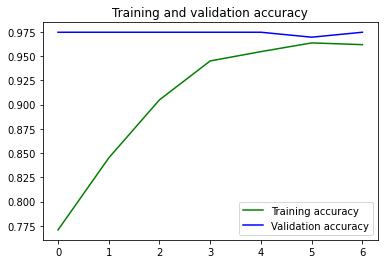

<Figure size 432x288 with 0 Axes>

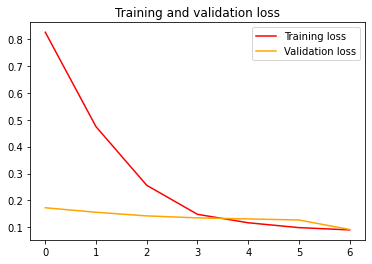

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
# create visualisation
import matplotlib.pyplot as plt
acc = predict.history['acc']
val_acc = predict.history['val_acc']
loss = predict.history['loss']
val_loss = predict.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#predicting any random image 
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

KeyboardInterrupt: ignored

## Okay, so in the implementation of the machine learning model this time, I added an algorithm that can accept file uploads from local storage then the output is the detected frames containing api, the rest is not included in output.avi (please remember, the output will automatically be in output. in your local storage, with the same folder as the original video file).

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  name_files = fn.split(".")[0] # get name file only, not with format file

  # get video data
  cap = cv2.VideoCapture(path)

  #save video
  # Define the codec and create VideoWriter object
  #final output is here, base implementation of our model ML
  width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # int `width`
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # int `height`
  FPS = int(cap.get(cv2.CAP_PROP_FPS)) # int 'Frame Per Second
  fourcc = cv2.VideoWriter_fourcc(*'MJPG') # decode to unicode for .avi file
  out = cv2.VideoWriter(f'{name_files}.avi', fourcc, FPS, (width,height)) # we will save output data in currently folder

  # im create a variable containt total frame by input video
  total_wait = len(cap.read()[1])
  # create !(NOT_TRUE) => TRUE, when frame total is 0 this "while syntax" will stop
  while not total_wait==0:
          # get video data and turn it into frame
          _, frame = video.read()
          #Convert the captured frame into RGB
          im = Image.fromarray(frame)
          #Resizing into 224x224 because we trained the model with this image size.
          im = im.resize((224,224))
          # image preprocessing as well like our model ML
          img_array = image.img_to_array(im)
          img_array = np.expand_dims(img_array, axis=0) / 255
          # probabilities prediction
          probabilities = model.predict(img_array)[0]
          #Calling the predict method on model to predict 'fire' on the image
          prediction = np.argmax(probabilities)
          #if prediction is 0.8, which means there is fire in the frame.
          if prediction > 0.8:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            print(probabilities[prediction])  
          # write frame pre frame from video file
          out.write(frame)
          # decrease variable frame to prevent over-loop
          total_wait -= 1

Saving videoplayback.mp4 to videoplayback (2).mp4
0.5886545
0.88937074
0.8989195
0.9280424
0.98988974
0.98711026
0.99481624
0.9856134
0.9915308
0.9805697
0.9692854
0.9784557
0.9590513
0.921584
0.76570755
0.64100635
0.51634455
0.5243976
0.7183283
0.7645771
0.9357615
0.5432241
0.55076766
0.62632656
0.5491731
0.6923012
0.5031036
0.68823975
0.9991672
0.9984407
0.9982145
0.999172
0.99890506
0.99802715
0.99918133
0.99944586
0.9995633
0.9997805
0.9996351
0.9994821
0.99838614
0.99897134
0.9962852
0.9950965
0.9982748
0.9942027
0.99483263
0.99701035
0.9982003
0.9995721
0.9997956
0.99972993
0.99948347
0.99967194
0.99901354
0.998632
0.9984633
0.9977695
0.9982564
0.99928445
0.9978623
0.99862325
0.9984524
0.9992424
0.99961555
0.99975914
0.999972
0.99996865
0.9998574
0.9998597
0.9977568
0.99941003
0.9970798
0.9997516
0.99989974
0.9997484
0.9998834
0.9997054
0.9992136
0.9982749
0.99679875
0.9997482
0.99886465
0.99980885
0.99950457
0.998021
0.9994863
0.999501
0.9986255
0.99610317
0.9861022
0.99805945
0

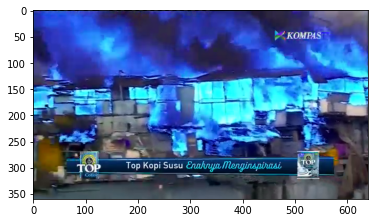

In [ ]:
plt.imshow(frame);

In [ ]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

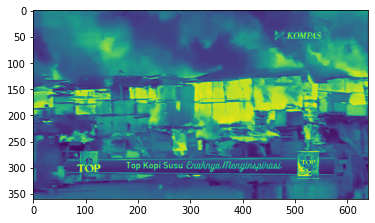

In [ ]:
plt.imshow(frame);